# Assignment 14 - Practice with Data Visualization (Starter)

## Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

Its fields include:

- `Rank`: ranking in overall sales
- `Name`: the name of the game
- `Platform`: platform for a game's initial release (e.g., PC, PS4, etc.)
- `Year`: the year of the game's release
- `Genre`: the genre of the game
- `Publisher`: the publisher of the game
- `NA_Sales`: number of units sold in North America (in millions)
- `EU_Sales`: number of units sold in Europe (in millions)
- `JP_Sales`: number of units sold in Japan (in millions)
- `Other_Sales`: number of unit sold sales in other regions (in millions)
- `Global_Sales`: total worldwide number of units sold

## Problem 1. Importing the Packages

**Action:** Import Pandas and Matplotlib.

In [1]:
# Your implementation:
import pandas as pd
import matplotlib.pyplot as plot


## Problem 2. Loading the Data

**Action:** Using Pandas, load the data set.

In [2]:
# Your implementation:
df = pd.read_csv("video-game-sales-data-set.csv")



## Problem 3. Creating a Bar Chart

There are lots of ways we can slice this data to help visualize it.

To start, one approach might be to filter the dataset down into something more manageable, for example:

- One platform
- One year

Then we can create a histogram of:

- X-axis: genre
- Y-axis: total worldwide sales (for the genre)

**Action:** Create a bar chart which visualizes worldwide sales by genre for one platform during one year.

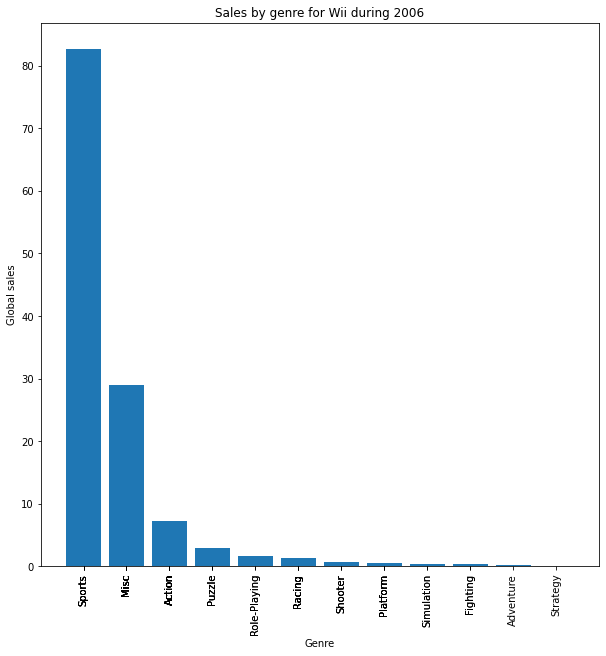

In [3]:
# Your implementation:
figure, axis = plot.subplots(figsize=(10,10))
wii2006 = df[(df.Platform=="Wii")&(df.Year==2006)]
genres = wii2006["Genre"]
sale = wii2006["Global_Sales"]
axis.bar(genres, sale)
axis.set_title("Sales by genre for Wii during 2006")
axis.set_xlabel("Genre")
axis.set_ylabel("Global sales")
axis.set_xticks(genres)
axis.set_xticklabels(
    genres, 
    rotation=90)
plot.show()


## Problem 4. Creating a Scatter Plot

There certainly are a lot of data points in the dataset.

It might be interesting to visualize the revenue for some specific platforms.  Let's filter out some of the heavy hitters and some smaller systems.

**Action:** Create a scatter plot that meets the following criteria:

- North American sales between 1 and 5 million units, inclusive
- Years between 2000 and 2010, inclusive
- Platforms: PS, PS2, PS3, and X360
- Uses different colors to highlight the sales for different platforms

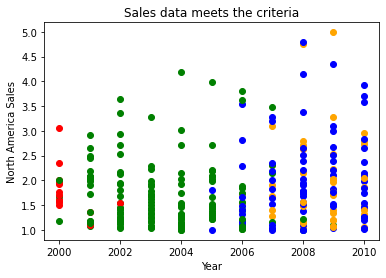

In [6]:
# Your implementation:
newdf = df[(df.NA_Sales<=5)&(df.NA_Sales>=1)&(df.Year>=2000)&(df.Year<=2010)&(df.Platform=="PS")|(df.NA_Sales<=5)&(df.NA_Sales>=1)&(df.Year>=2000)&(df.Year<=2010)&(df.Platform=="PS3")|(df.NA_Sales<=5)&(df.NA_Sales>=1)&(df.Year>=2000)&(df.Year<=2010)&(df.Platform=="PS2")|(df.NA_Sales<=5)&(df.NA_Sales>=1)&(df.Year>=2000)&(df.Year<=2010)&(df.Platform=="X360")]
figure, axis = plot.subplots()
colors = {"PS":"red", "PS2":"green", "PS3":"orange", "X360":"blue"}
axis.set_title("Sales data meets the criteria")
axis.set_xlabel("Year")
axis.set_ylabel("North America Sales")
for i in newdf.index:
    axis.scatter(newdf["Year"][i], newdf["NA_Sales"][i], color=colors[newdf["Platform"][i]])
#, color=colors[newdf["Platform"][i]]

## Problem 5. Creating a Line Chart with Multiple Series

Now let's track the sales for a single platform across different regions over time.

This would be a good candidate for a line chart with multiple series.

**Action:** Create a line chart with the following criteria:

- Only PS3 platform
- Shows a line (series) for each region (NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales)
- Value shown is the sum of all video game sales per region per year

2006.0
2016.0


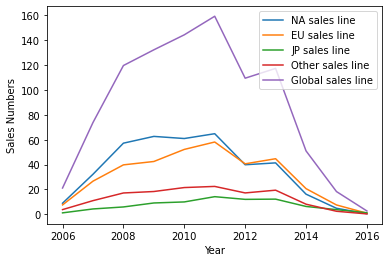

In [5]:
# Your implementation:
newdf=df[df.Platform=="PS3"]
startyear = 9999
endyear = 0
for i in newdf.index:
    if newdf["Year"][i] >= endyear:
        endyear = newdf["Year"][i]
    if newdf["Year"][i] <= startyear:
        startyear = newdf["Year"][i]
print(startyear)
print(endyear)

x_axis_data = range(int(startyear), int(endyear+1))
figure, axis = plot.subplots()
NA_Saleslist=[]
EU_Saleslist=[]
JP_Saleslist=[]
OTH_Saleslist=[]
GLO_Saleslist=[]
for i in range(int(startyear), int(endyear+1)):
    NAcurrentyeartotal = 0
    EUcurrentyeartotal = 0
    JPcurrentyeartotal = 0
    OTHcurrentyeartotal = 0
    GlobalCurrentyeartotal = 0
    for a in newdf.index:
        if newdf["Year"][a]==i:
            NAcurrentyeartotal += newdf["NA_Sales"][a]
            EUcurrentyeartotal += newdf["EU_Sales"][a]
            JPcurrentyeartotal += newdf["JP_Sales"][a]
            OTHcurrentyeartotal += newdf["Other_Sales"][a]
            GlobalCurrentyeartotal += newdf["Global_Sales"][a]
    NA_Saleslist.append(NAcurrentyeartotal)
    EU_Saleslist.append(EUcurrentyeartotal)
    JP_Saleslist.append(JPcurrentyeartotal)
    OTH_Saleslist.append(OTHcurrentyeartotal)
    GLO_Saleslist.append(GlobalCurrentyeartotal)
axis.set_xlabel("Year")
axis.set_ylabel("Sales Numbers")
axis.plot(x_axis_data, NA_Saleslist, label="NA sales line")
axis.plot(x_axis_data, EU_Saleslist, label="EU sales line")
axis.plot(x_axis_data, JP_Saleslist, label="JP sales line")
axis.plot(x_axis_data, OTH_Saleslist, label="Other sales line")
axis.plot(x_axis_data, GLO_Saleslist, label="Global sales line")
axis.legend()